## Adagrad-RMSProp-Adam

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

 Example to generate data
 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)
y= -1*x+2


#### Plot the data points. 

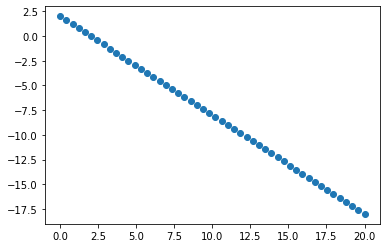

In [3]:
plt.scatter(x,y)

## Adagrad

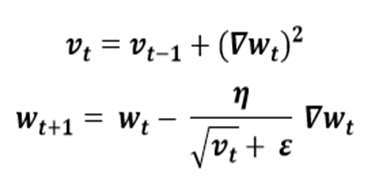

In [4]:
def Adgard (x1,y1,alpha,epislon,iterations):
            
        theta0=np.array([0])
        theta1= np.array([0])
        AllLoss=[]
        AllTheta0=[]
        AllTheta1=[]
        AllHypothesis=[]

        vt0=0
        vt1=0
        
        while (iterations>1):
    

            AllTheta0.append(theta0)
            AllTheta1.append(theta1)
            predictedOutput=(theta0)+ (theta1*x1)

            AllHypothesis.append(predictedOutput)

            costFunction= 1/len(x1) * (np.sum((predictedOutput-y1)**2))

            AllLoss.append(costFunction)
            if (abs(costFunction) <= 0.001):
                break
            else :
                vt0 = vt0 + ((1/len(x1)*np.sum(predictedOutput-y1))**2)
                theta0=theta0 - ( (alpha/(sqrt(vt0)+epislon))  *  ((1/len(x1))*np.sum(predictedOutput-y1)))

                vt1=vt1 + (((1/len(x1))* (np.sum((predictedOutput-y1)*x1)))**2)
                theta1=theta1 - ( (alpha/(sqrt(vt1)+epislon)) * ((1/len(x1))* (np.sum((predictedOutput-y1)*x1))))
            iterations=iterations-1 

        return AllTheta0,AllTheta1,AllLoss,AllHypothesis,theta0,theta1,predictedOutput




In [5]:
AdgardAllTheta0,AdgardAllTheta1,AdgradAllError,AdgardAllHypo,AdgardOptTheta0,AdgardOptTheta1,AdgardFinalHypo= Adgard(x,y,0.4,1e-8,100)

In [6]:
from sklearn.metrics import r2_score
r2_score(y,AdgardFinalHypo)


0.9916216002698272

Text(0, 0.5, 'Cost')

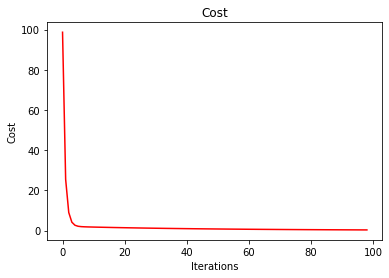

In [7]:
Iterations= list(range(0, len(AdgradAllError)))

plt.plot(Iterations,AdgradAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

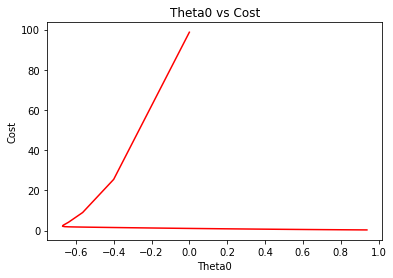

In [8]:
plt.plot(AdgardAllTheta0,AdgradAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

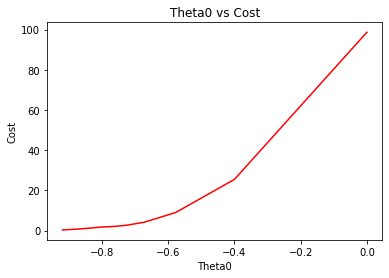

In [9]:
plt.plot(AdgardAllTheta1,AdgradAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")



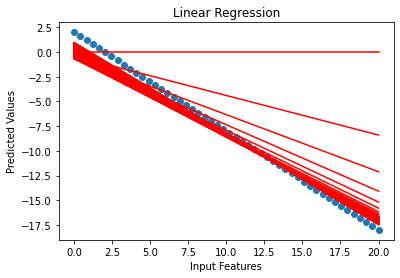

In [10]:
plt.scatter(x,y)
for i in range (len(AdgardAllTheta0)):
    predict = AdgardAllTheta0[i]+AdgardAllTheta1[i]*x
    plt.plot(x,predict,color='red')
    plt.title("Linear Regression")
    plt.xlabel("Input Features")
    plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

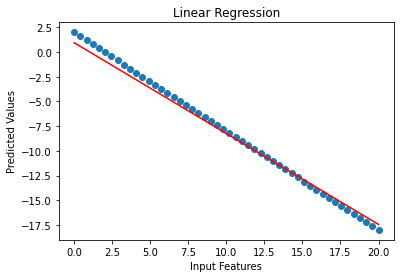

In [11]:
plt.scatter(x,y)
plt.plot(x,AdgardFinalHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")

# Adgard with Another HyperParametrs

In [12]:
NewAdgardAllTheta0,NewAdgardAllTheta1,NewAdgradAllError,NewAdgardAllHypo,NewAdgardOptTheta0,NewAdgardOptTheta1,NewAdgardFinalHypo= Adgard(x,y,0.01,1e-8,100)

In [13]:
from sklearn.metrics import r2_score
r2_score(y,NewAdgardFinalHypo)


-0.7421094893970779

Text(0, 0.5, 'Cost')

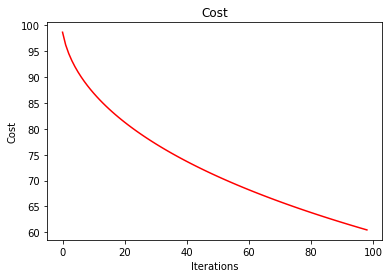

In [14]:
Iterations= list(range(0, len(NewAdgradAllError)))

plt.plot(Iterations,NewAdgradAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

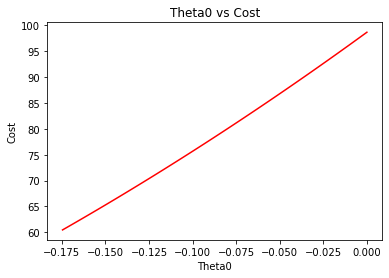

In [15]:
plt.plot(NewAdgardAllTheta0,NewAdgradAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")



Text(0, 0.5, 'Cost')

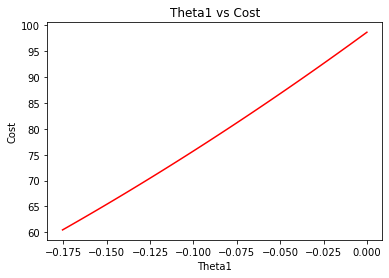

In [16]:
plt.plot(NewAdgardAllTheta1,NewAdgradAllError,color='red')
plt.title("Theta1 vs Cost")
plt.xlabel("Theta1")
plt.ylabel("Cost")



Text(0, 0.5, 'Predicted Values')

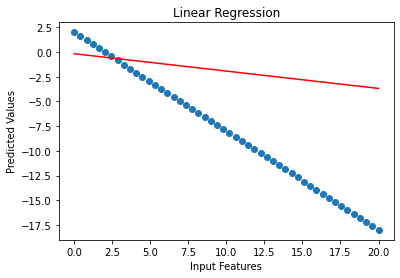

In [17]:
plt.scatter(x,y)
plt.plot(x,NewAdgardFinalHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")

## RMSProp

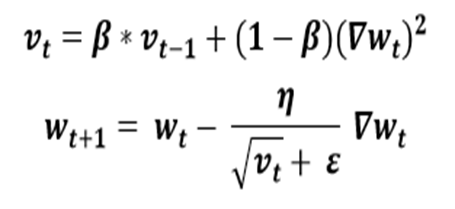

In [18]:
def RMSPROP (x1,y1,alpha,epislon,beta,iterations):
            
        theta0=np.array([0])
        theta1= np.array([0])
        AllLoss=[]
        AllTheta0=[]
        AllTheta1=[]
        AllHypothesis=[]
        vt0=0
        vt1=0
        
        while (iterations>1):
    
            

            AllTheta0.append(theta0)
            AllTheta1.append(theta1)
            predictedOutput=(theta0)+ (theta1*x1)

            AllHypothesis.append(predictedOutput)

            costFunction= 1/len(x1) * (np.sum((predictedOutput-y1)**2))

            AllLoss.append(costFunction)
            if (abs(costFunction) <= 0.001):
                break
            else :
                vt0 = (beta)*vt0 +  ((1-beta)*((1/len(x1)*np.sum(predictedOutput-y1))**2))
                theta0=theta0 - ( (alpha/(sqrt(vt0)+epislon))  *  ((1/len(x1))*np.sum(predictedOutput-y1)))
        
                vt1=(beta)*vt1 + ((1-beta)*(((1/len(x1))* (np.sum((predictedOutput-y1)*x1)))**2))
                theta1=theta1 - ( (alpha/(sqrt(vt1)+epislon)) * ((1/len(x1))* (np.sum((predictedOutput-y1)*x1)))) 
            iterations=iterations-1 

        return AllTheta0,AllTheta1,AllLoss,AllHypothesis,theta0,theta1,predictedOutput




In [19]:
RMSAllTheta0,RMSAllTheta1,RMSAllError,RMSAllHypo,RMSOptTheta0,RMSOptTheta1,RMSHypo= RMSPROP(x,y,0.4,1e-8,0.98,100)

In [20]:
from sklearn.metrics import r2_score
r2_score(y,RMSHypo)


0.999973546822533

Text(0, 0.5, 'Cost')

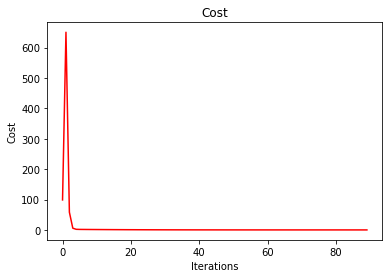

In [21]:
Iterations= list(range(0, len(RMSAllError)))

plt.plot(Iterations,RMSAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

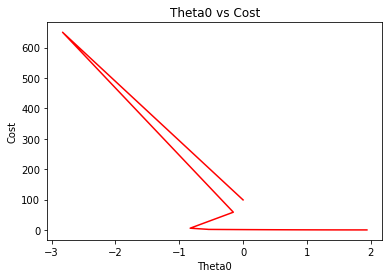

In [22]:
plt.plot(RMSAllTheta0,RMSAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

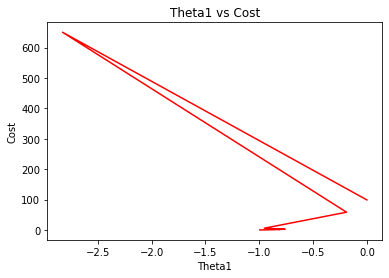

In [23]:
plt.plot(RMSAllTheta1,RMSAllError,color='red')
plt.title("Theta1 vs Cost")
plt.xlabel("Theta1")
plt.ylabel("Cost")

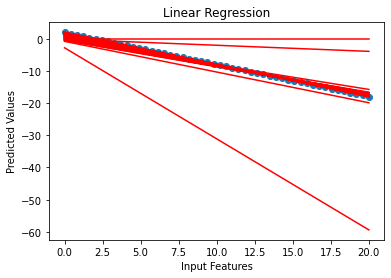

In [24]:
plt.scatter(x,y)
for i in range (len(RMSAllHypo)):
    #predict = AdgardAllTheta0[i]+AdgardAllTheta1[i]*x
    
    plt.plot(x,RMSAllHypo[i],color='red')
    plt.title("Linear Regression")
    plt.xlabel("Input Features")
    plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

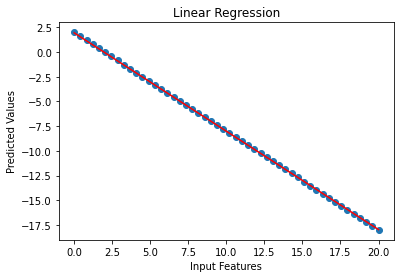

In [25]:
plt.scatter(x,y)
plt.plot(x,RMSHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")

# RMS With Another HyperParametrs

In [26]:
NewRMSAllTheta0,NewRMSAllTheta1,NewRMSAllError,NewRMSAllHypo,NewRMSOptTheta0,NewRMSOptTheta1,NewRMSHypo= RMSPROP(x,y,0.4,1e-8,0.5,100)

In [27]:
from sklearn.metrics import r2_score
r2_score(y,NewRMSHypo)


0.8203690341285719

Text(0, 0.5, 'Cost')

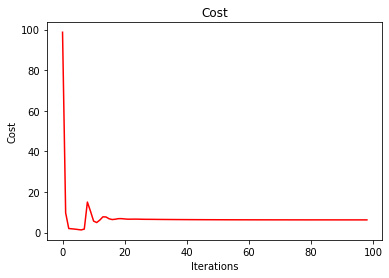

In [28]:
Iterations= list(range(0, len(NewRMSAllError)))

plt.plot(Iterations,NewRMSAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

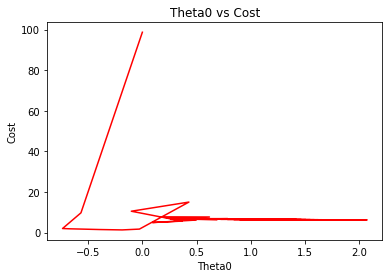

In [29]:
plt.plot(NewRMSAllTheta0,NewRMSAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

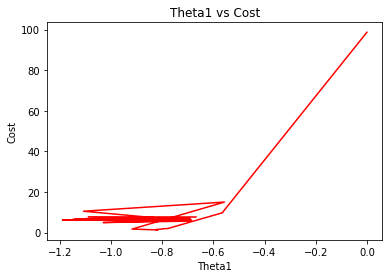

In [30]:
plt.plot(NewRMSAllTheta1,NewRMSAllError,color='red')
plt.title("Theta1 vs Cost")
plt.xlabel("Theta1")
plt.ylabel("Cost")

Text(0, 0.5, 'Predicted Values')

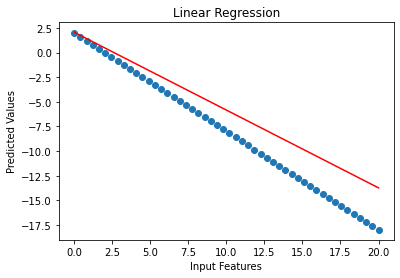

In [31]:
plt.scatter(x,y)
plt.plot(x,NewRMSHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")

## Adam

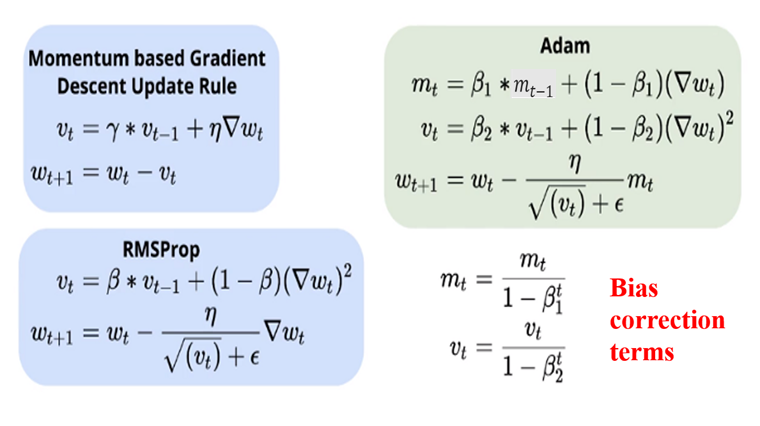

In [32]:
def Adams (x1,y1,alpha,epislon,betaV,betaM,iterations):
            
        theta0=np.array([0])
        theta1= np.array([0])
        AllLoss=[]
        AllTheta0=[]
        AllTheta1=[]
        AllHypothesis=[]
        vt0=0
        vt1=0
        mt0=0
        mt1=0
        i=1
        while (iterations>1):
    
            

            AllTheta0.append(theta0)
            AllTheta1.append(theta1)
            predictedOutput=(theta0)+ (theta1*x1)

            AllHypothesis.append(predictedOutput)

            costFunction= 1/len(x1) * (np.sum((predictedOutput-y1)**2))

            AllLoss.append(costFunction)
            if (abs(costFunction) <= 0.001):
                break
            else :
                vt0 = (betaV)*vt0 +  ((1-betaV)*((1/len(x1)*np.sum(predictedOutput-y1))**2))
                mt0 = (betaM)*mt0 + ( (1-betaM)* ((1/len(x1))*np.sum(predictedOutput-y1)) )
        
                vt0= vt0/(1-(betaV**i))
                mt0= mt0/(1-(betaM**i))
                theta0=theta0 - ( (alpha/(sqrt(vt0)+epislon))  * mt0 )
                 
                 
        
                vt1=(betaV)*vt1 + ((1-betaV)*(((1/len(x1))* (np.sum((predictedOutput-y1)*x1)))**2))
                mt1 = (betaM)*mt1 + ( (1-betaM)* ((1/len(x1))*np.sum((predictedOutput-y1)*x1)))
                vt1=vt1/(1-(betaV**(i)))
                mt1=mt1/(1-(betaM**(i)))
                theta1=theta1 - ( (alpha/(sqrt(vt1)+epislon)) * mt1 )
                i=i+1 
            iterations=iterations-1 

        return AllTheta0,AllTheta1,AllLoss,AllHypothesis,theta0,theta1,predictedOutput




In [33]:
AdamsAllTheta0,AdamsAllTheta1,AdamsAllError,AdamsAllHypo,AdamsOptTheta0,AdamsOptTheta1,AdamsHypo= Adams(x,y,0.4,1e-8,0.4,0.7,100)

In [34]:
from sklearn.metrics import r2_score
r2_score(y,AdamsHypo)



0.9999990298120474

Text(0, 0.5, 'Cost')

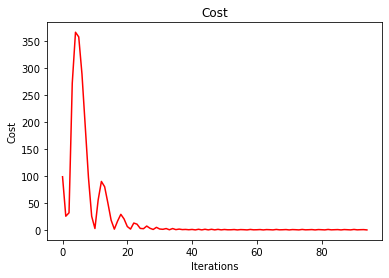

In [35]:
Iterations= list(range(0, len(AdamsAllError)))

plt.plot(Iterations,AdamsAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")



Text(0, 0.5, 'Cost')

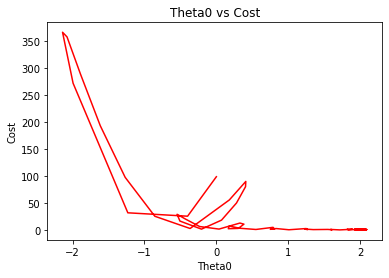

In [36]:
plt.plot(AdamsAllTheta0,AdamsAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

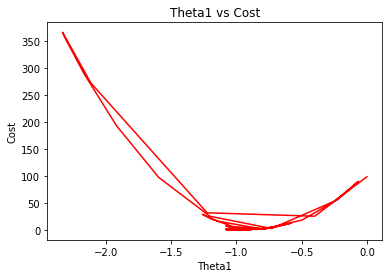

In [37]:
plt.plot(AdamsAllTheta1,AdamsAllError,color='red')
plt.title("Theta1 vs Cost")
plt.xlabel("Theta1")
plt.ylabel("Cost")

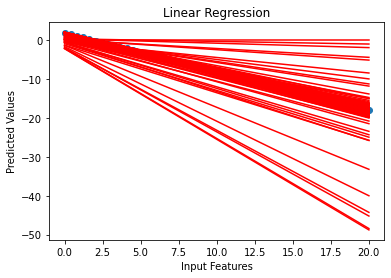

In [38]:
plt.scatter(x,y)
for i in range (len(AdamsAllHypo)):
    #predict = AdgardAllTheta0[i]+AdgardAllTheta1[i]*x
    
    plt.plot(x,AdamsAllHypo[i],color='red')
    plt.title("Linear Regression")
    plt.xlabel("Input Features")
    plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

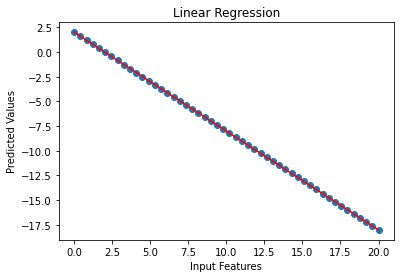

In [39]:
plt.scatter(x,y)
plt.plot(x,AdamsHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")

# Adams with Another HyperParametrs

In [40]:
NewAdamsAllTheta0,NewAdamsAllTheta1,NewAdamsAllError,NewAdamsAllHypo,NewAdamsOptTheta0,NewAdamsOptTheta1,NewAdamsHypo= Adams(x,y,0.01,1e-8,0.9,0.98,1000)

In [41]:
from sklearn.metrics import r2_score
r2_score(y,NewAdamsHypo)



-2.101613879932884e+31

Text(0, 0.5, 'Cost')

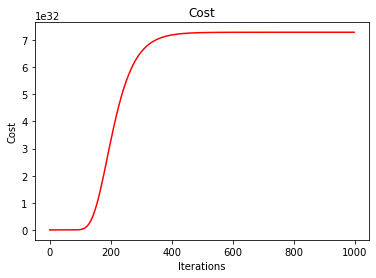

In [42]:
Iterations= list(range(0, len(NewAdamsAllError)))

plt.plot(Iterations,NewAdamsAllError,color='red')
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")



Text(0, 0.5, 'Cost')

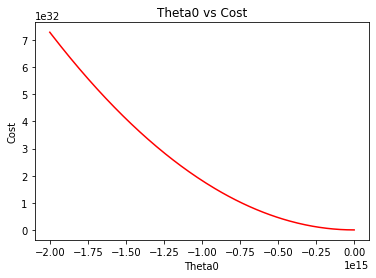

In [43]:
plt.plot(NewAdamsAllTheta0,NewAdamsAllError,color='red')
plt.title("Theta0 vs Cost")
plt.xlabel("Theta0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

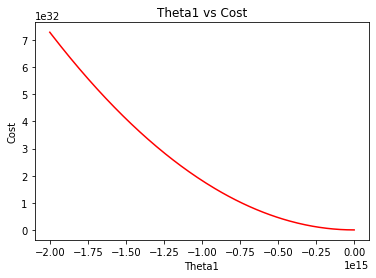

In [44]:
plt.plot(NewAdamsAllTheta0,NewAdamsAllError,color='red')
plt.title("Theta1 vs Cost")
plt.xlabel("Theta1")
plt.ylabel("Cost")

Text(0, 0.5, 'Predicted Values')

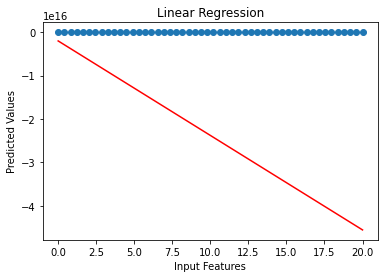

In [45]:
plt.scatter(x,y)
plt.plot(x,NewAdamsHypo,color='red')
plt.title("Linear Regression")
plt.xlabel("Input Features")
plt.ylabel("Predicted Values")